In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
# Import Data
temp = pd.read_csv('TG_STAID002759.txt', sep=',', skiprows=19)
temp.head()

,SOUID,DATE,TG,Q_TG
0,111448,19510101,-40,0
1,111448,19510102,-14,0
2,111448,19510103,-12,0
3,111448,19510104,4,0
4,111448,19510105,25,0


In [10]:
# Change column headers

# Rename columns
temp.columns = [names.replace(" ", "").lower() for names in temp.columns.to_list()]

# Add timestamp
temp['timestamp'] = pd.to_datetime(temp['date'], format= '%Y%m%d')

# Put timestamp in index
temp = temp.set_index('timestamp')

# Cut off data before 1970
temp = temp[temp.index.year >= 1970]

# Transform temperature to Celsius
temp['temp'] = temp['tg']/10
temp

,souid,date,tg,q_tg,temp
timestamp,,,,,
1970-01-01,111448,19700101,-128,0,-12.8
1970-01-02,111448,19700102,-49,0,-4.9
1970-01-03,111448,19700103,-14,0,-1.4
1970-01-04,111448,19700104,-44,0,-4.4
1970-01-05,111448,19700105,-30,0,-3.0
...,...,...,...,...,...
2020-12-27,111448,20201227,16,0,1.6
2020-12-28,111448,20201228,28,0,2.8
2020-12-29,111448,20201229,23,0,2.3


In [11]:
temp['q_tg'].value_counts()

0    18628
Name: q_tg, dtype: int64

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18628 entries, 1970-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   souid   18628 non-null  int64  
 1   date    18628 non-null  int64  
 2   tg      18628 non-null  int64  
 3   q_tg    18628 non-null  int64  
 4   temp    18628 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 873.2 KB


In [13]:
df_train = temp.iloc[:-365, -1:]

df_test = temp.iloc[-365:, -1:]

df = temp.iloc[:, -1:]

n_years = df_train.index.year.max() - df_train.index.year.min()
n_days = df_train.index.dayofyear.max() - df_train.index.dayofyear.min()
#df_train.index.strftime('%j')

print(df_train.shape, df_test.shape, df.shape, n_years, n_days)
print(df_train)

(18263, 1) (365, 1) (18628, 1) 50 365
            temp
timestamp       
1970-01-01 -12.8
1970-01-02  -4.9
1970-01-03  -1.4
1970-01-04  -4.4
1970-01-05  -3.0
...          ...
2019-12-28   1.3
2019-12-29   0.0
2019-12-30   4.5
2019-12-31   6.0
2020-01-01   2.7

[18263 rows x 1 columns]


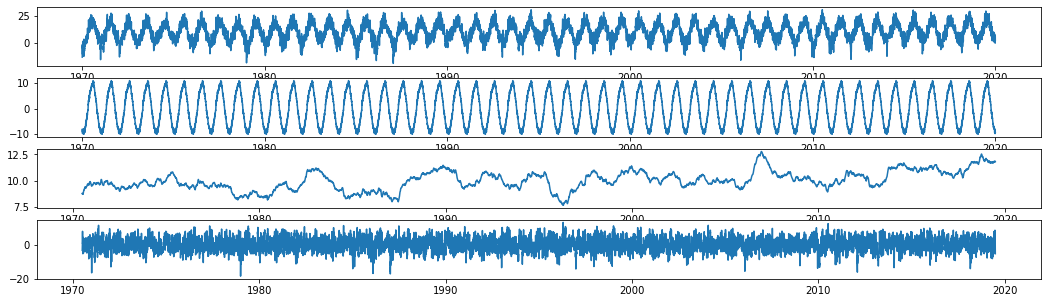

In [14]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(18, 5))

decompose_result = seasonal_decompose(df_train['temp'], model="additive", period = n_days)

observed = decompose_result.observed
trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

ax[0].plot(observed, label='observed')
ax[1].plot(seasonal, label='seasonal')
ax[2].plot(trend, label='trend')
ax[3].plot(residual, label='resid')

In [32]:
temp
# already cut of years < 1970


,souid,date,tg,q_tg,temp
timestamp,,,,,
1970-01-01,111448,19700101,-128,0,-12.8
1970-01-02,111448,19700102,-49,0,-4.9
1970-01-03,111448,19700103,-14,0,-1.4
1970-01-04,111448,19700104,-44,0,-4.4
1970-01-05,111448,19700105,-30,0,-3.0
...,...,...,...,...,...
2020-12-27,111448,20201227,16,0,1.6
2020-12-28,111448,20201228,28,0,2.8
2020-12-29,111448,20201229,23,0,2.3


In [17]:
temp['q_tg'].value_counts(normalize = True)

0    1.0
Name: q_tg, dtype: float64

In [18]:
temp.groupby(temp['date'].astype(str).str[:4])['q_tg'].sum()

date
1970    0
1971    0
1972    0
1973    0
1974    0
1975    0
1976    0
1977    0
1978    0
1979    0
1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
Name: q_tg, dtype: int64

In [19]:
temp.groupby([temp['date'].astype(str).str[:4], 'q_tg'])['souid'].count()

date  q_tg
1970  0       365
1971  0       365
1972  0       366
1973  0       365
1974  0       365
1975  0       365
1976  0       366
1977  0       365
1978  0       365
1979  0       365
1980  0       366
1981  0       365
1982  0       365
1983  0       365
1984  0       366
1985  0       365
1986  0       365
1987  0       365
1988  0       366
1989  0       365
1990  0       365
1991  0       365
1992  0       366
1993  0       365
1994  0       365
1995  0       365
1996  0       366
1997  0       365
1998  0       365
1999  0       365
2000  0       366
2001  0       365
2002  0       365
2003  0       365
2004  0       366
2005  0       365
2006  0       365
2007  0       365
2008  0       366
2009  0       365
2010  0       365
2011  0       365
2012  0       366
2013  0       365
2014  0       365
2015  0       365
2016  0       366
2017  0       365
2018  0       365
2019  0       365
2020  0       366
Name: souid, dtype: int64

In [20]:
temp_9 = temp[(temp['q_tg'] == 9)]
temp_cleaned = temp[(temp['q_tg'] != 9)]

<AxesSubplot:xlabel='timestamp'>

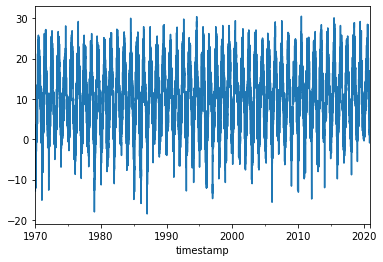

In [21]:
temp_cleaned['temp'].plot()

# Test Train Split

In [22]:
df_train = temp_cleaned[:-365]

df_test = temp_cleaned[-365:]

df = temp_cleaned

# Analyse the Trend

In [23]:
df_train.shape

(18263, 5)

In [24]:
df_train['timestep'] = list(range(len(df_train)))
X = df_train[['timestep']]
y = df_train['temp']
X, y

<ipython-input-24-3d07b2140ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['timestep'] = list(range(len(df_train)))


(            timestep
 timestamp           
 1970-01-01         0
 1970-01-02         1
 1970-01-03         2
 1970-01-04         3
 1970-01-05         4
 ...              ...
 2019-12-28     18258
 2019-12-29     18259
 2019-12-30     18260
 2019-12-31     18261
 2020-01-01     18262
 
 [18263 rows x 1 columns],
 timestamp
 1970-01-01   -12.8
 1970-01-02    -4.9
 1970-01-03    -1.4
 1970-01-04    -4.4
 1970-01-05    -3.0
               ... 
 2019-12-28     1.3
 2019-12-29     0.0
 2019-12-30     4.5
 2019-12-31     6.0
 2020-01-01     2.7
 Name: temp, Length: 18263, dtype: float64)

In [25]:
m_trend = LinearRegression()
m_trend.fit(X,y)

LinearRegression()

In [26]:
df_train['trend'] = m_trend.predict(X)

<ipython-input-26-de2afd442d5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['trend'] = m_trend.predict(X)


In [27]:
m_trend.score(X, y)

0.004930047149008243

<AxesSubplot:xlabel='timestamp'>

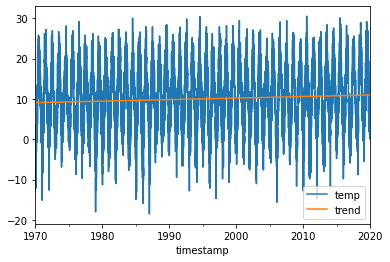

In [28]:
df_train[['temp', 'trend']].plot()

<AxesSubplot:xlabel='timestamp'>

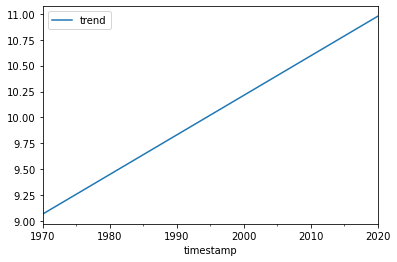

In [29]:
df_train[['trend']].plot()